<a href="https://colab.research.google.com/github/marcelounb/Deep_Learning_with_python_JasonBrownlee/blob/master/20_1_Improve_Model_Performance_With_Image_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Improve Model Performance With Image Augmentation**

Data preparation is required when working with neural network and deep learning models. Increasingly data augmentation is also required on more complex object recognition tasks. 

In this lesson you will discover how to use data preparation and data augmentation with your image datasets when developing and evaluating deep learning models in Python with Keras. After completing this lesson, you will know:

. About the image augmentation API provide by Keras and how to use it with your models.

. How to perform feature standardization.

. How to perform ZCA whitening of your images.

. How to augment data with random rotations, shifts and ﬂips of images.

. How to save augmented image data to disk.

**20.1 Keras Image Augmentation API**

Like the rest of Keras, the image augmentation API is simple and powerful. Keras provides the ImageDataGenerator class that deﬁnes the conﬁguration for image data preparation and augmentation. This includes capabilities such as:

. Feature-wise standardization.
ZCA whitening.

. Random rotation, shifts, shear and ﬂips.

. Dimension reordering.

. Save augmented images to disk.

An augmented image generator can be created as follows:

    datagen = ImageDataGenerator()

Rather than performing the operations on your entire image dataset in memory, the API is designed to be iterated by the deep learning model ﬁtting process, creating augmented image data for you just-in-time. 

This reduces your memory overhead, but adds some additional time cost during model training. After you have created and conﬁgured your ImageDataGenerator, you must ﬁt it on your data. This will calculate any statistics required to actually perform the transforms to your image data. 

You can do this by calling the fit() function on the data generator and pass it your training dataset.

    datagen.fit(train)

The data generator itself is in fact an iterator, returning batches of image samples when requested. We can conﬁgure the batch size and prepare the data generator and get batches of images by calling the flow() function.

    X_batch, y_batch = datagen.flow(train, train, batch_size=32)

Finally we can make use of the data generator. Instead of calling the fit() function on our model, we must call the fit_generator() function and pass in the data generator and the desired length of an epoch as well as the total number of epochs on which to train.

    fit_generator(datagen, samples_per_epoch=len(train), epochs=100)


# 20.2 Point of Comparison for Image Augmentation
Now that you know how the image augmentation API in Keras works, let’s look at some examples. We will use the **MNIST handwritten digit recognition** task in these examples (learn more in Section 19.1). To begin, let’s take a look at the ﬁrst 9 images in the training dataset.


In [7]:
# Plot of images as baseline for comparison 
from keras.datasets import mnist 
from matplotlib import pyplot as plt

# Standardize images across the dataset, mean=0, stdev=1 
from keras.datasets import mnist 
from keras.preprocessing.image import ImageDataGenerator 



In [2]:
# load data 
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

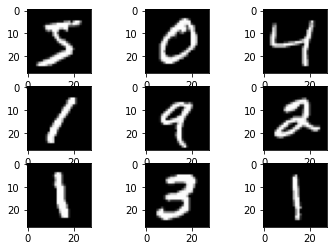

In [6]:
# create a grid of 3x3 images 
for i in range(0, 9): 
  plt.subplot(330 + 1 + i) 
  plt.imshow(X_train[i], cmap=plt.get_cmap( 'gray' ))
# show the plot
plt.show()

# 20.3 Feature Standardization
It is also possible to standardize pixel values across the entire dataset. This is called feature standardization and mirrors the type of standardization often performed for each column in a tabular dataset. This is different to sample standardization described in the previous section as pixel values are standardized across all samples (all images in the dataset). In this case each image is considered a feature. You can perform feature_standardization by setting the featurewise center and featurewise_std_normalization arguments on the ImageDataGenerator class

In [9]:
# reshape to be [samples][pixels][width][height] 
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28) 
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28) 
# convert from int to float 
X_train = X_train.astype( 'float32' ) 
X_test = X_test.astype( 'float32' ) 

In [10]:
# define data preparation 
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True) 

In [11]:
# fit parameters from data 
datagen.fit(X_train) 

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  ' channels).')


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


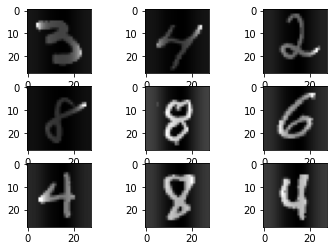

In [17]:
# configure batch size and retrieve one batch of images 
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9): 
  # create a grid of 3x3 images 
  for i in range(0, 9): 
    plt.subplot(330 + 1 + i) 
    plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap( 'gray' )) 
  # show the plot 
  plt.show() 
  break

Running this example you can see that the effect on the actual images, seemingly darkening and lightening different digits.

# 20.4 ZCA Whitening
A whitening transform of an image is a linear algebra operation that reduces the redundancy in the matrix of pixel images. Less redundancy in the image is intended to better highlight the structures and features in the image to the learning algorithm. Typically, image whitening is performed using the Principal Component Analysis (PCA) technique. More recently, an alternative called ZCA (learn more in Appendix A of this tech report2) shows better results and results in transformed images that keeps all of the original dimensions and unlike PCA, resulting transformed images still look like their originals. You can perform a ZCA whitening transform by setting the zca whitening argument to True.


In [18]:
# define data preparation 
datagen = ImageDataGenerator(zca_whitening=True) 

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [19]:
# fit parameters from data 
datagen.fit(X_train) 

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  ' channels).')


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


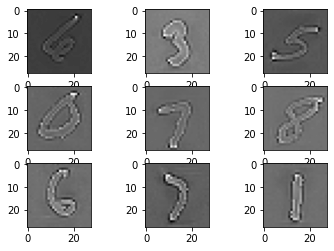

In [20]:
# configure batch size and retrieve one batch of images 
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9): 
  # create a grid of 3x3 images 
  for i in range(0, 9): 
    plt.subplot(330 + 1 + i) 
    plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap( 'gray' )) 
  # show the plot 
  plt.show() 
  break

Running the example, you can see the same general structure in the images and how the outline of each digit has been highlighted.